In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "camel"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 109
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel       0           1   0.600000  0.096774  0.166667  0.728383   
1   camel       0           2   0.666667  0.100000  0.173913  0.692083   
2   camel       0           3   0.600000  0.130435  0.214286  0.809506   
3   camel       0           4   0.000000  0.000000  0.000000  0.756325   
4   camel       0           5   0.000000  0.000000  0.000000  0.696806   

      gmean        ap   specifi model  
0  0.309239  0.361436  0.988166  base  
1  0.315348  0.308088  0.994444  base  
2  0.359111  0.461393  0.988701  base  
3  0.000000  0.234002  0.971751  base  
4  0.000000  0.215616  0.983333  base

In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel      15          16   0.532258  0.634615  0.578947  0.802885   
1   camel      15          17   0.407407  0.550000  0.468085  0.732031   
2   camel      15          18   0.428571  0.660000  0.519685  0.788000   
3   camel      15          19   0.509091  0.651163  0.571429  0.792549   
4   camel      15          20   0.426230  0.530612  0.472727  0.741046   

      gmean        ap   specifi      model  
0  0.714328  0.598728  0.804054  ecoselekt  
1  0.663325  0.413625  0.800000  ecoselekt  
2  0.682935  0.629603  0.706667  ecoselekt  
3  0.734288  0.559226  0.828025  ecoselekt  
4  0.638453  0.484682  0.768212  ecoselekt

In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

project  window  test_split  precision    recall        f1       auc  \
0   camel      15          16   0.952381  0.384615  0.547945  0.945881   
1   camel      15          17   0.937500  0.375000  0.535714  0.899375   
2   camel      15          18   0.968750  0.620000  0.756098  0.929867   
3   camel      15          19   1.000000  0.488372  0.656250  0.916087   
4   camel      15          20   0.952381  0.408163  0.571429  0.904582   

      gmean        ap   specifi model  
0  0.618075  0.889569  0.993243  best  
1  0.610456  0.752623  0.993750  best  
2  0.784772  0.857486  0.993333  best  
3  0.698836  0.820157  1.000000  best  
4  0.636758  0.794493  0.993377  best

(8742, 11)


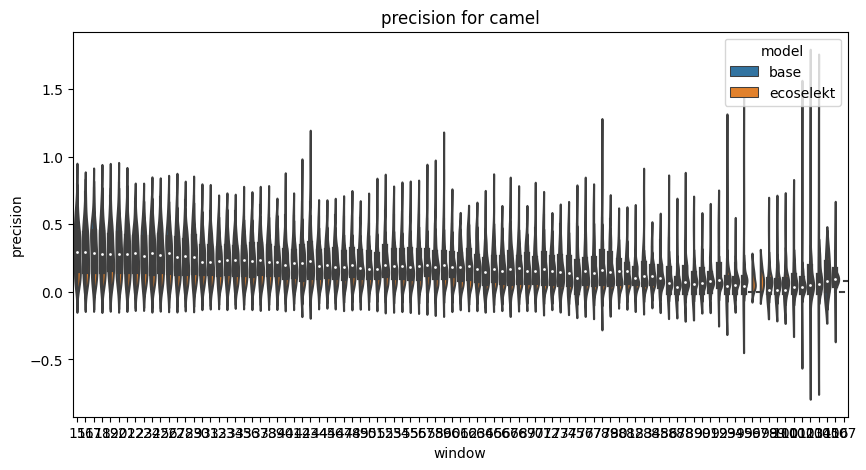

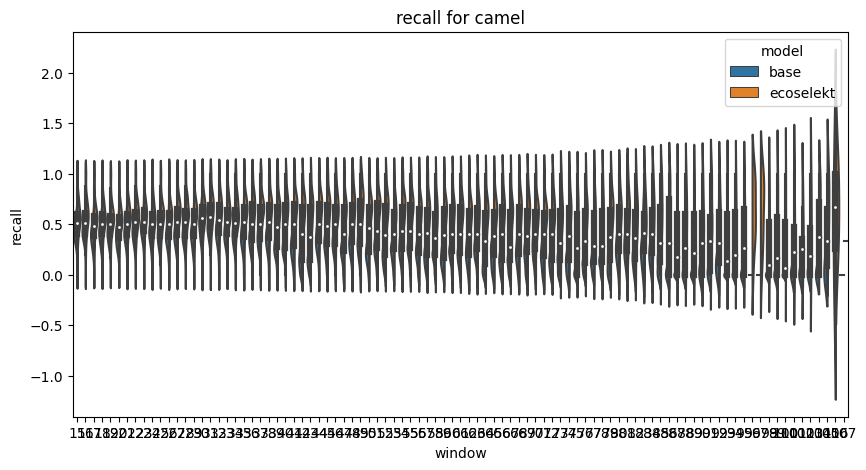

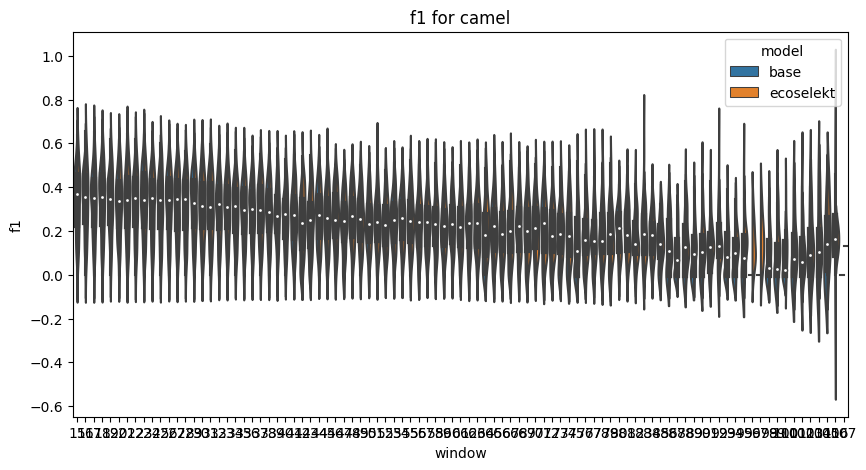

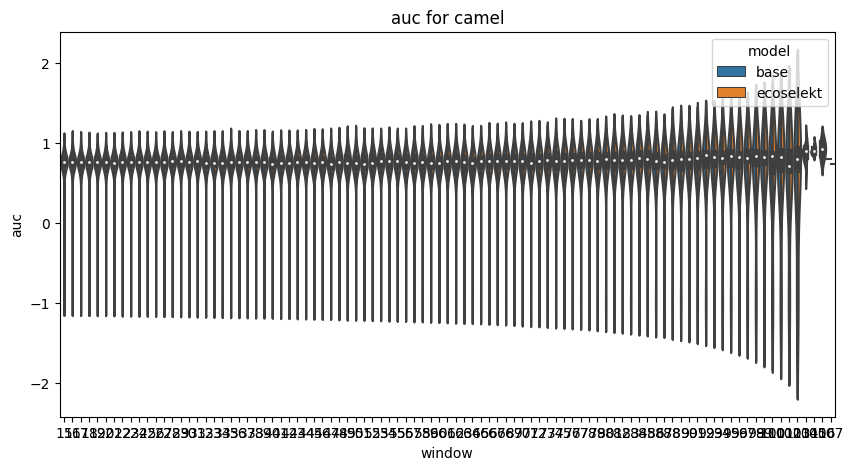

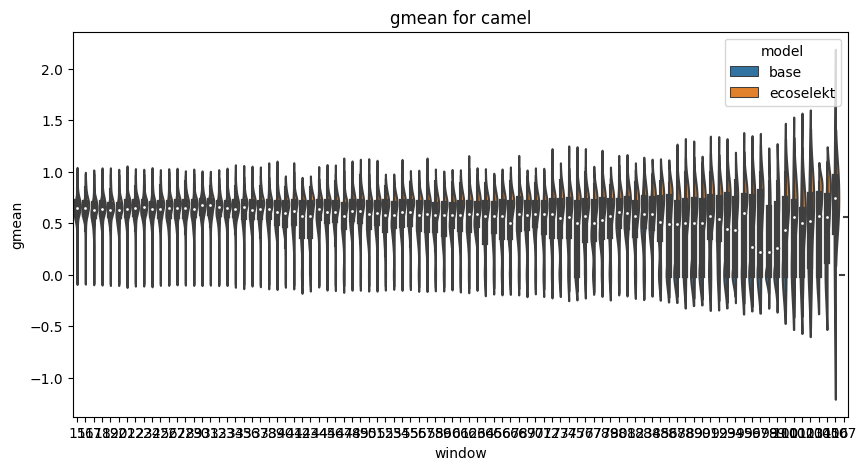

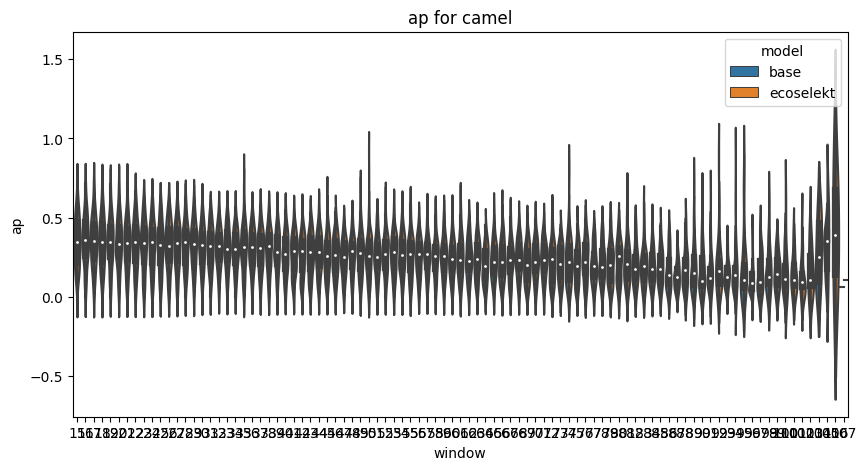

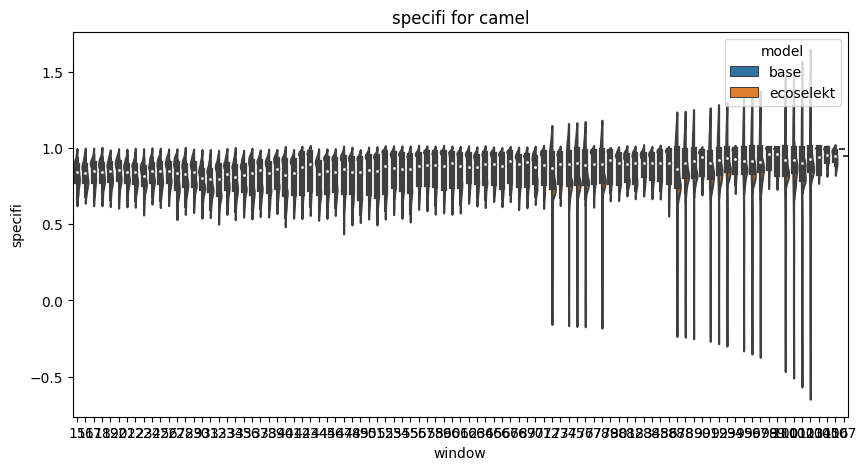

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


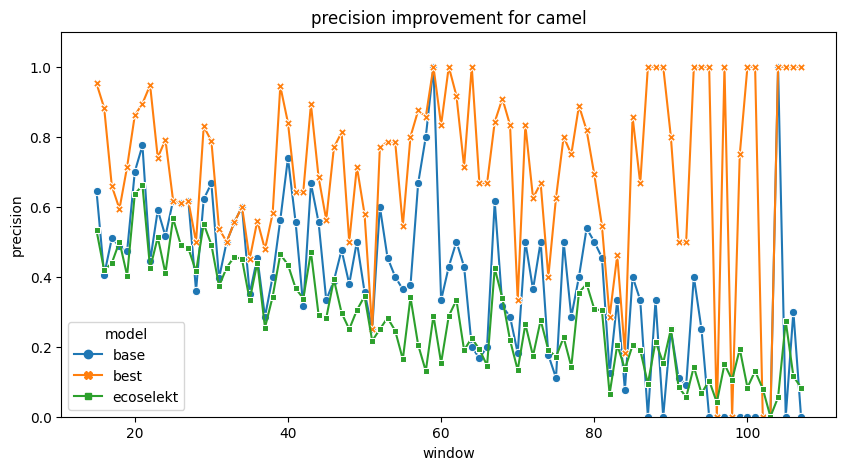

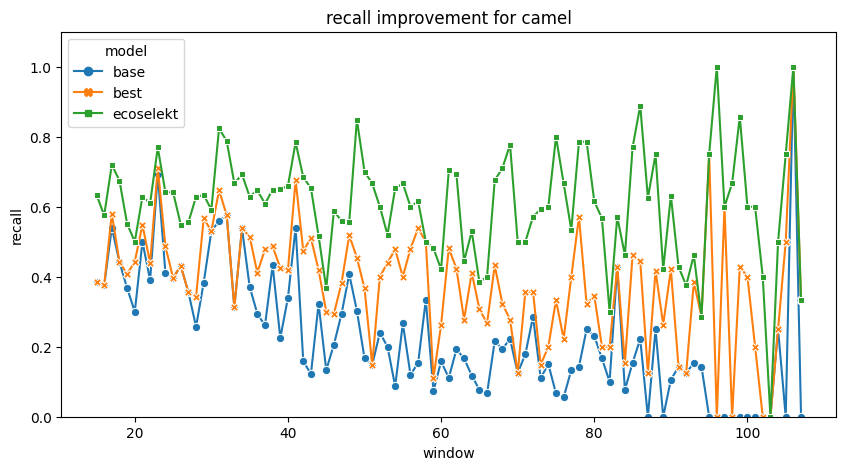

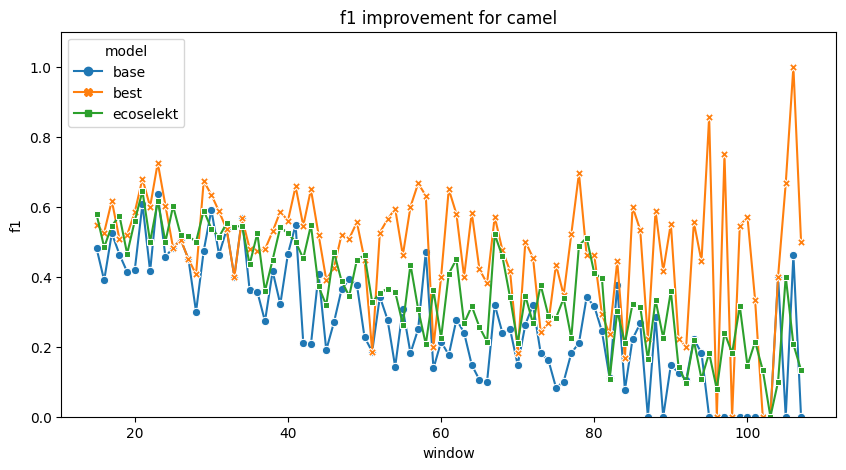

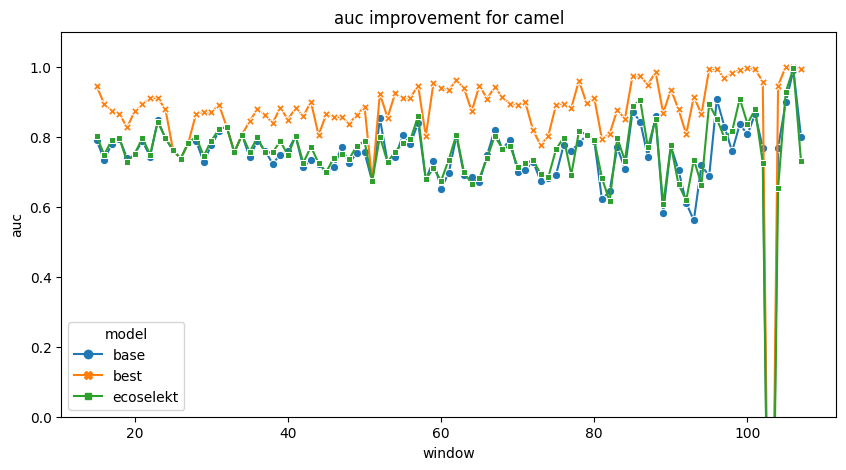

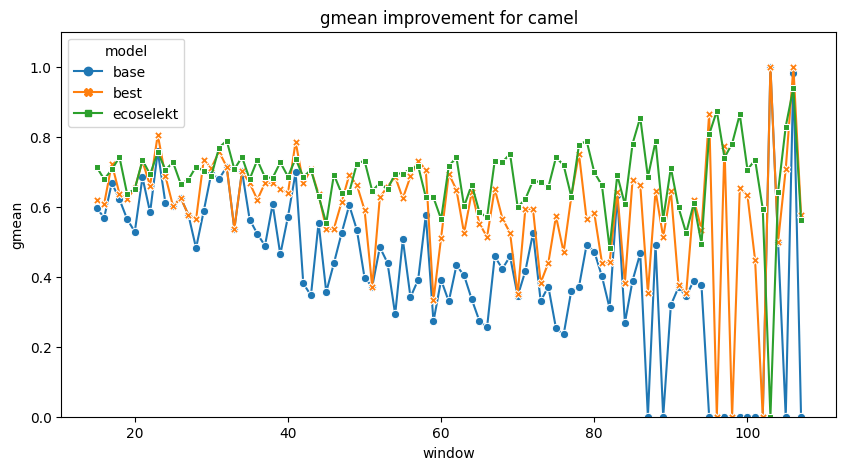

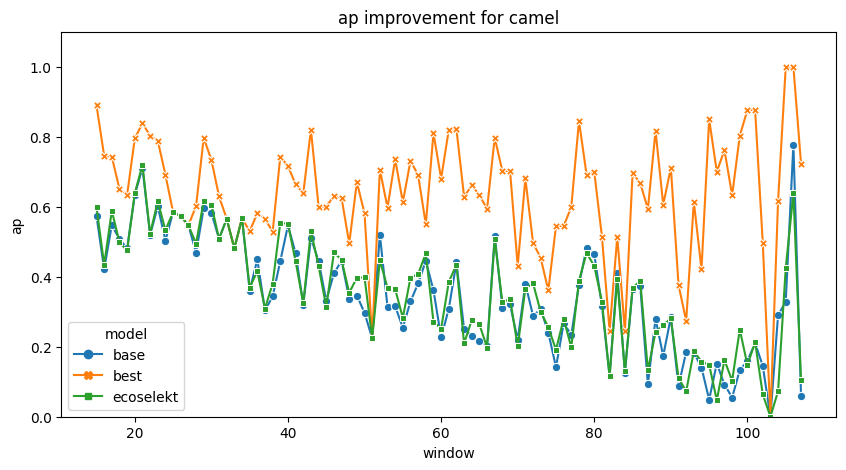

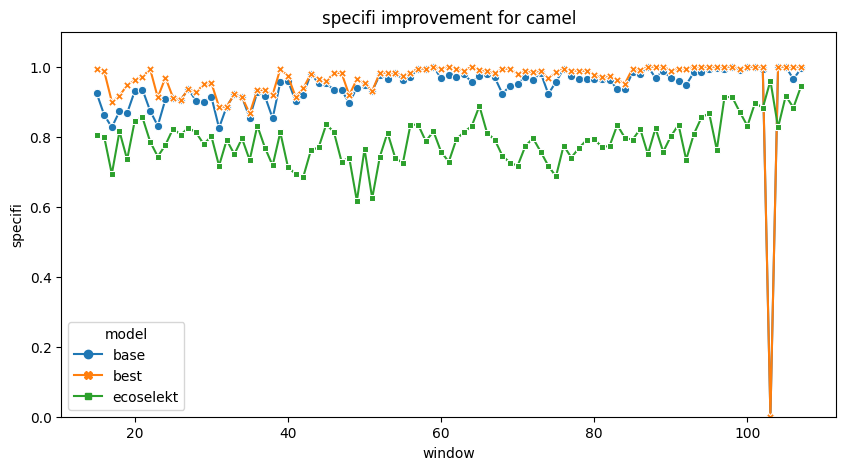

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

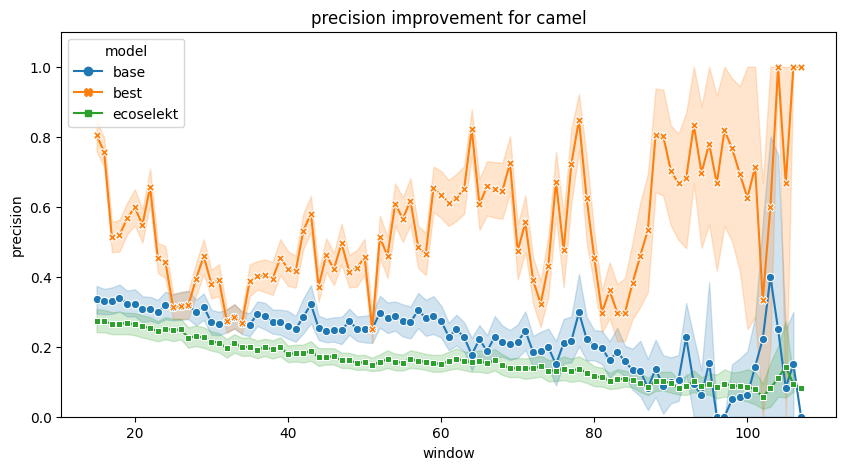

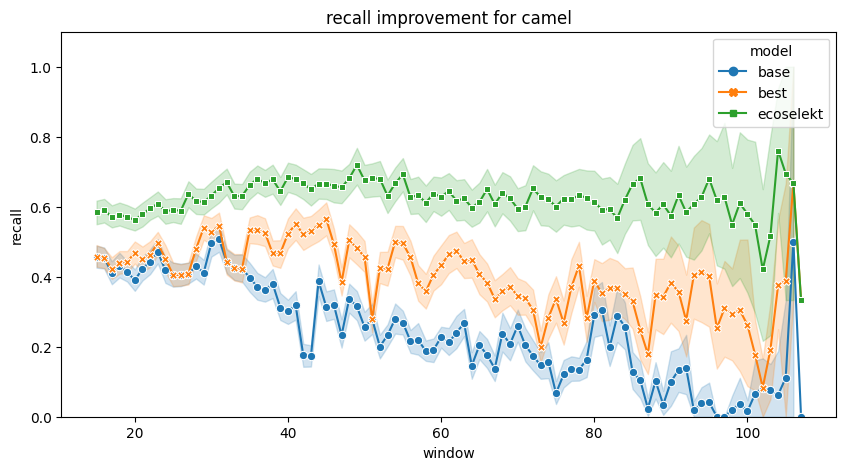

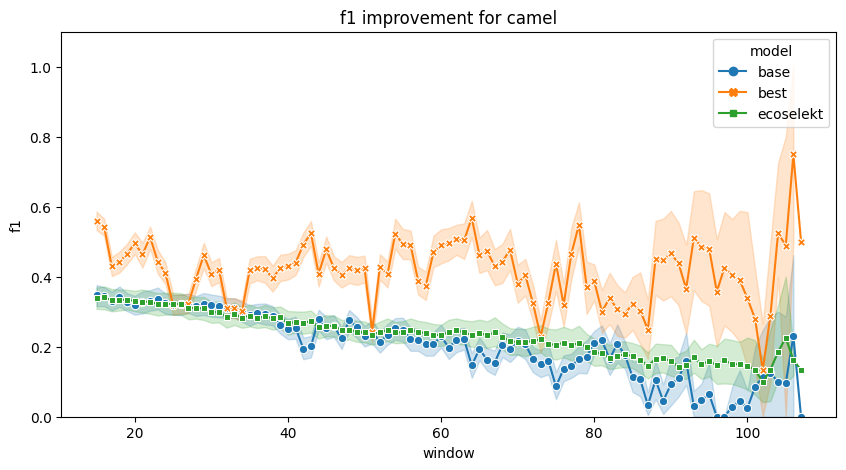

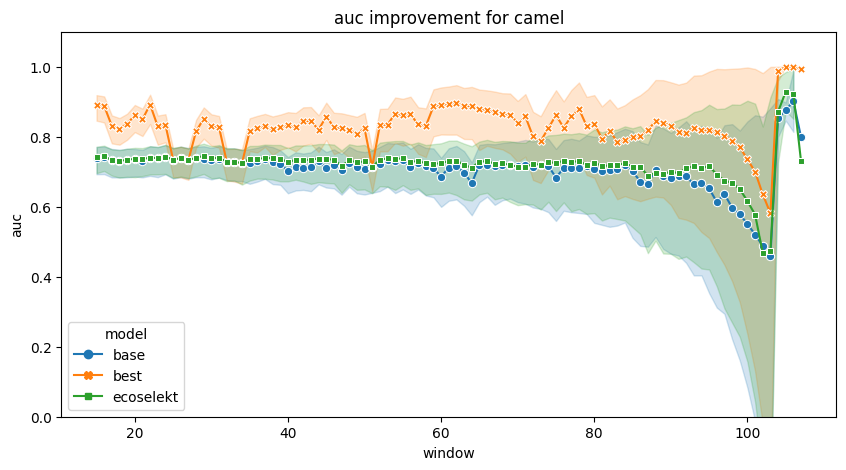

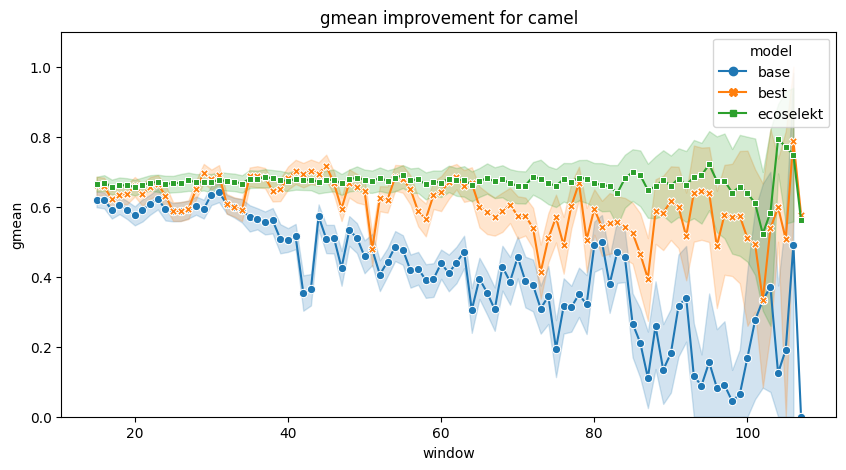

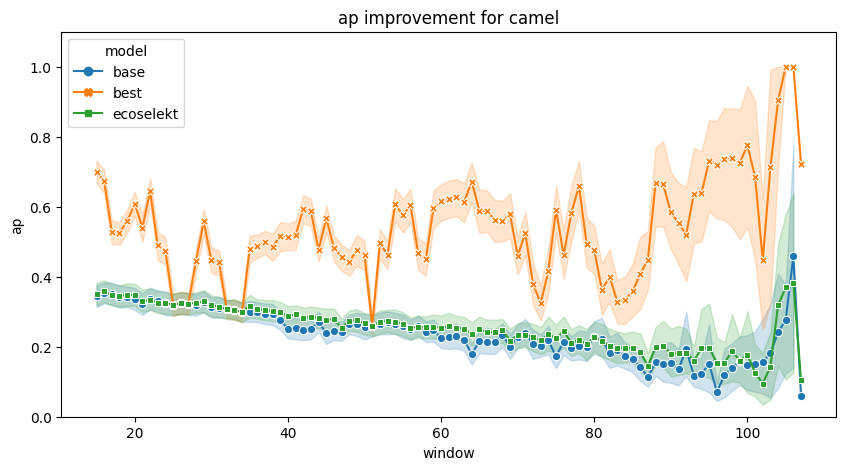

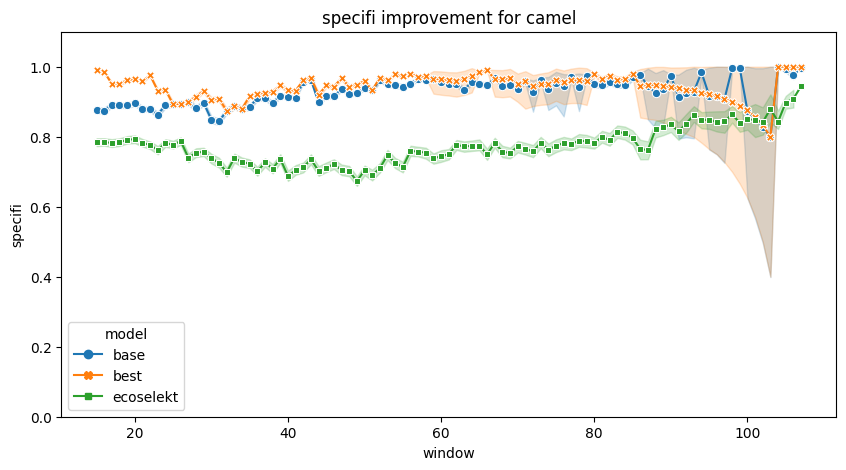

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.004489153621994094
Wilcoxon test significance: True


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 1.1895708763812222e-16
Wilcoxon test significance: True


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(874200, 4)


commit_id  window  test_split  model_version
0  232f61dbb8c43a3e346138d174d823ad62d05967      15          16              0
1  2bebfdb7769796ed8adb1815a3319135456de196      15          16              0
2  8fdbf156a4bd747f3443ac5bde770a4ab3c615cc      15          16              0
3  304562d547f743d4e411d5b44fd6ecaa69758c8b      15          16              0
4  ff5ccbc7f1d8fb73b9a8d383c1dbff2b9d13a355      15          16              0

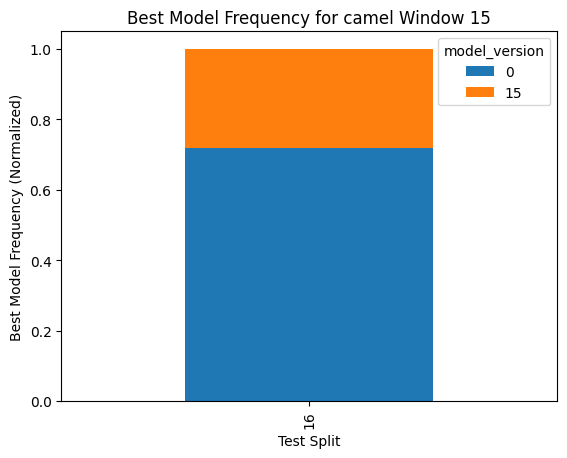

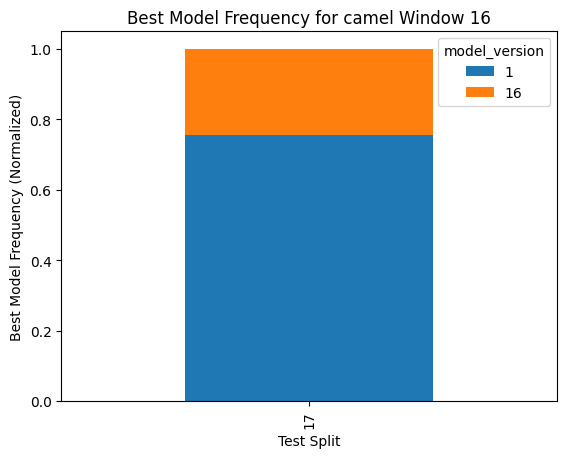

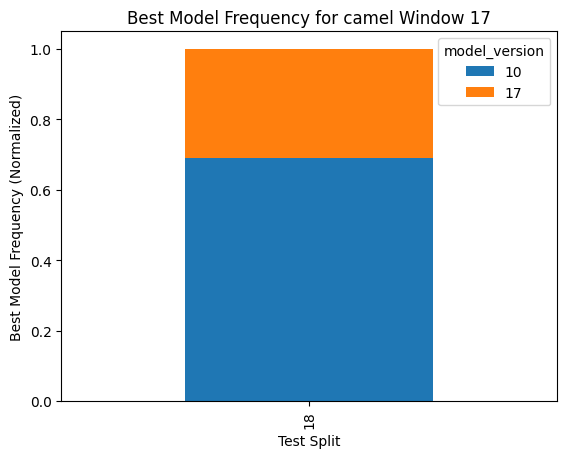

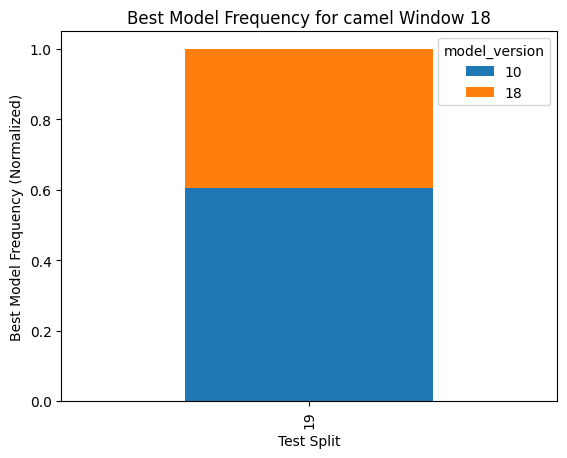

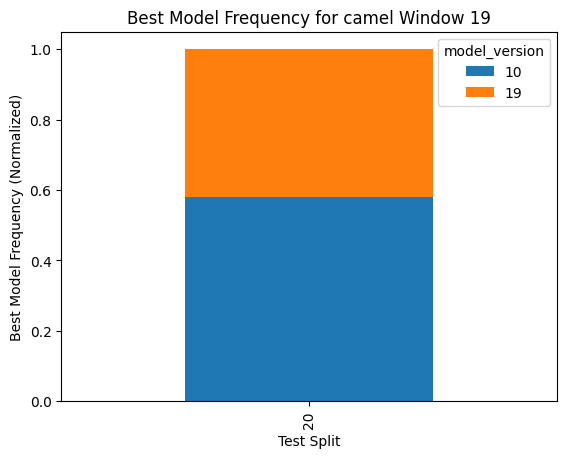

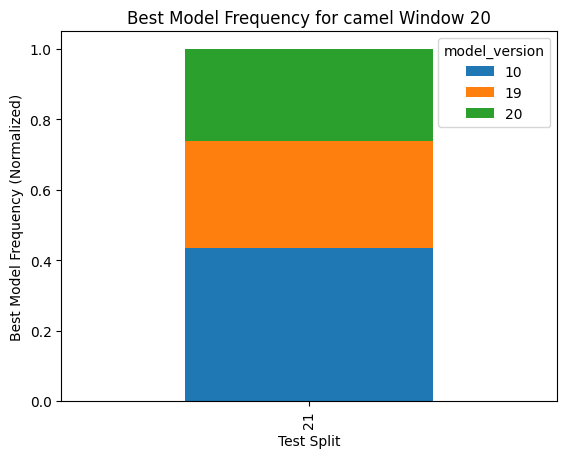

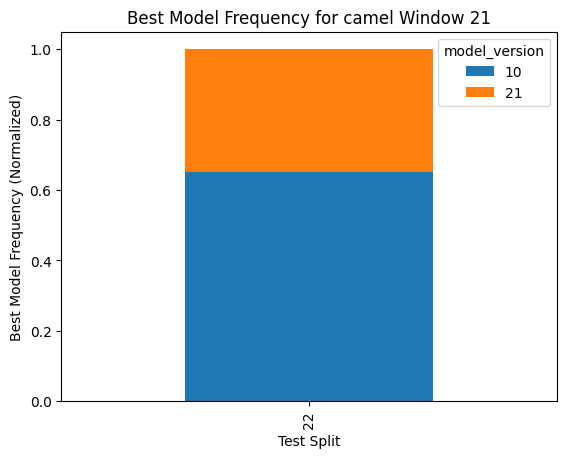

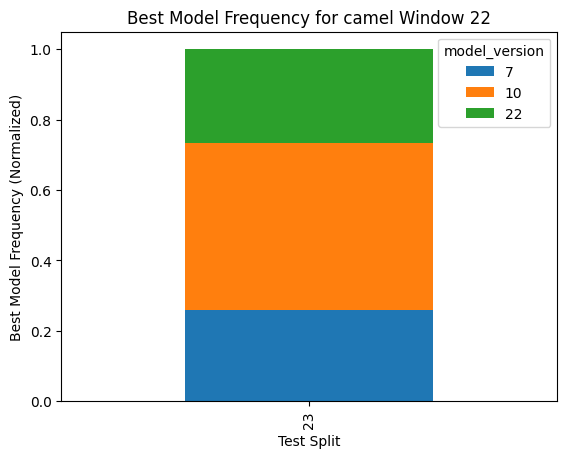

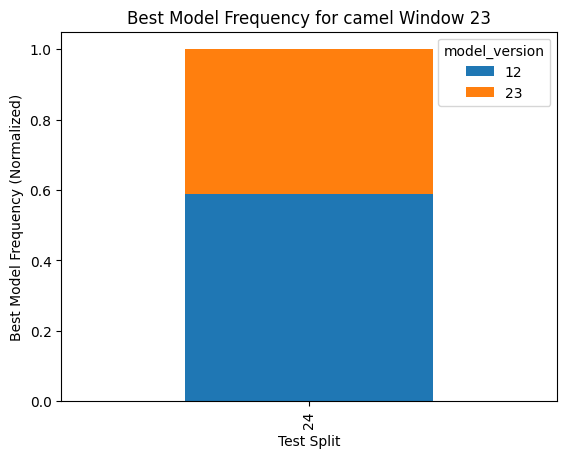

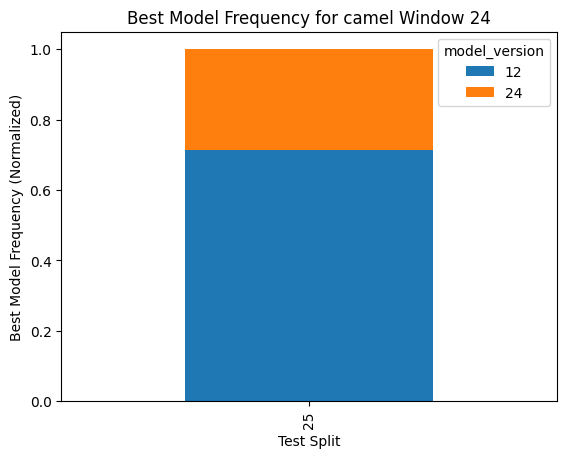

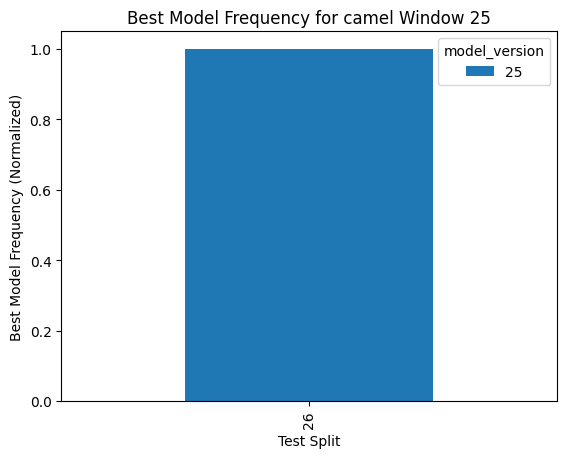

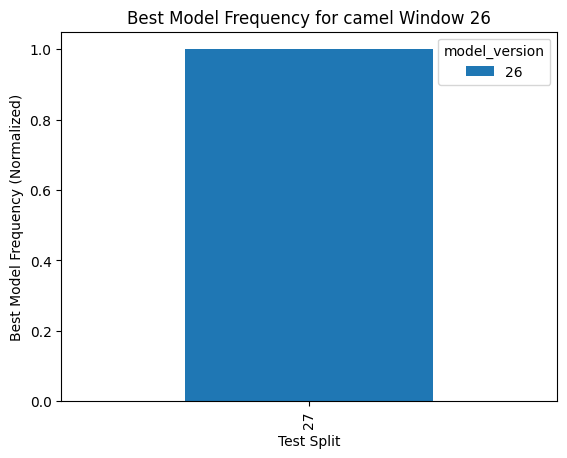

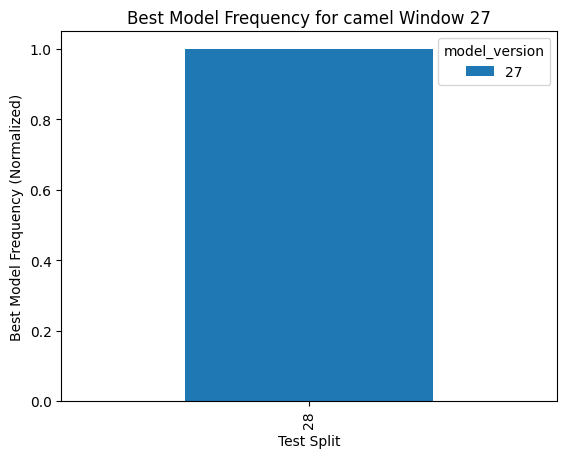

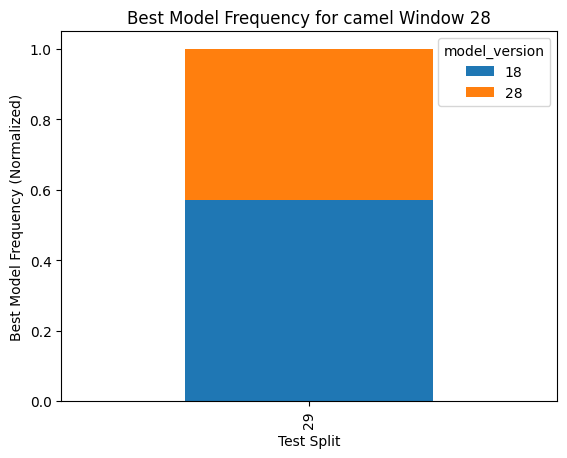

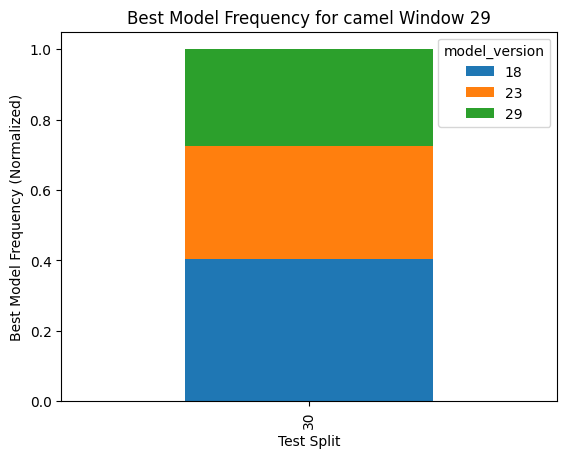

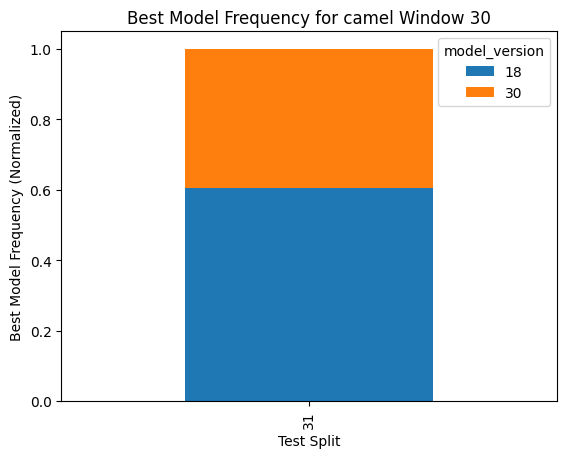

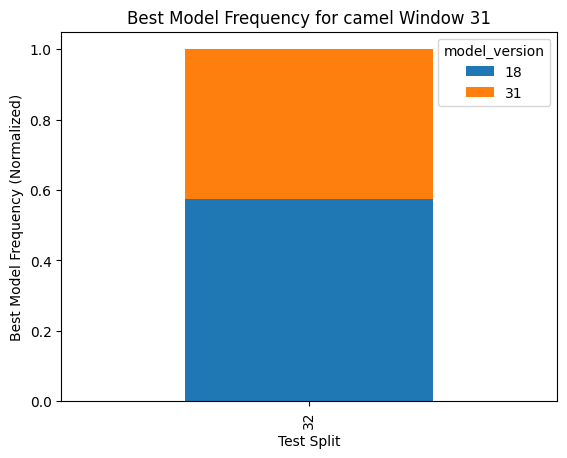

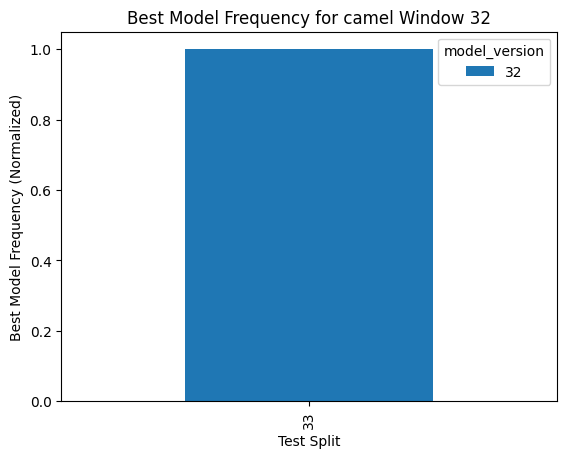

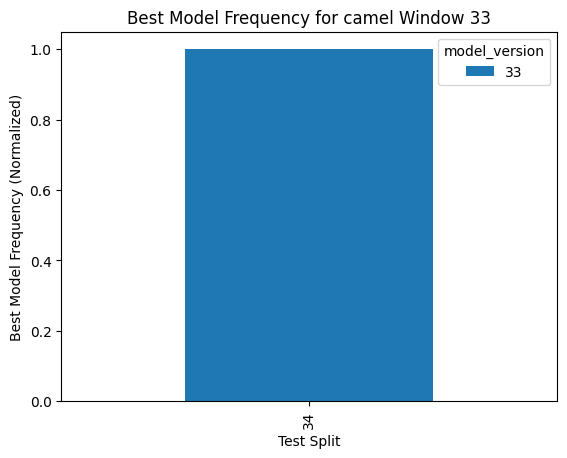

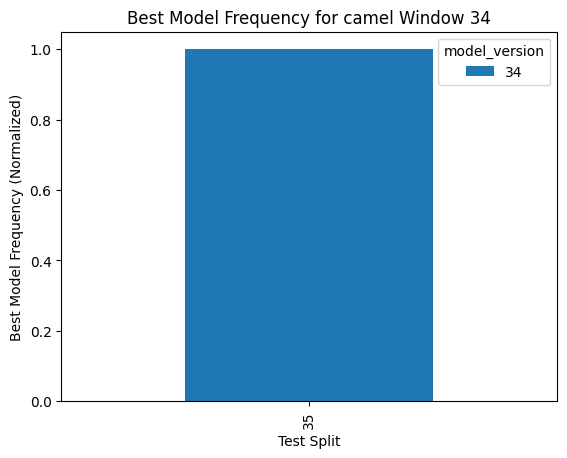

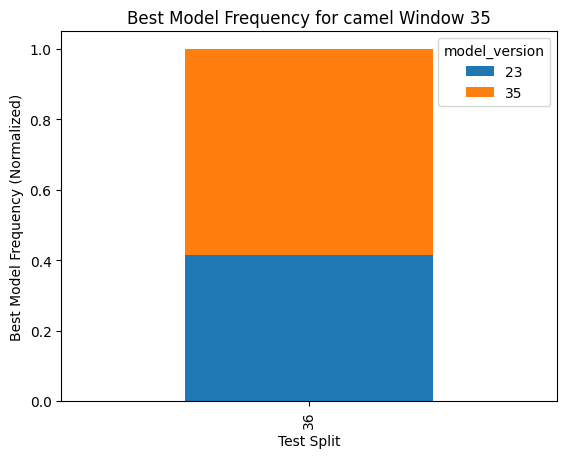

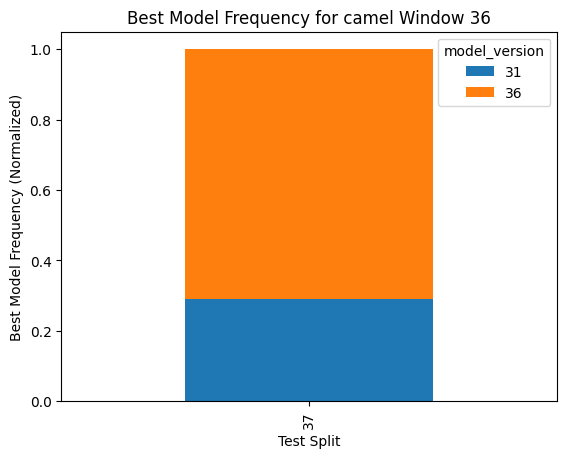

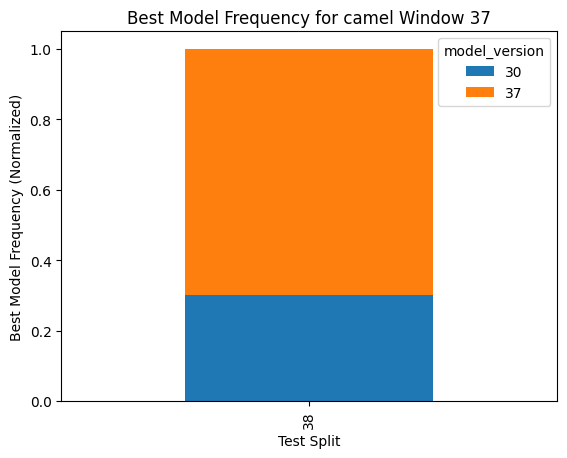

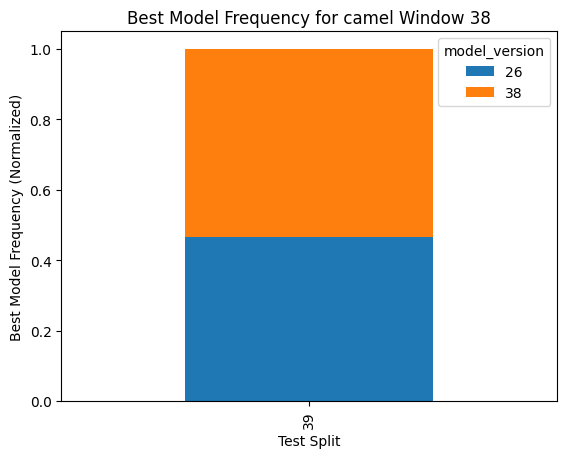

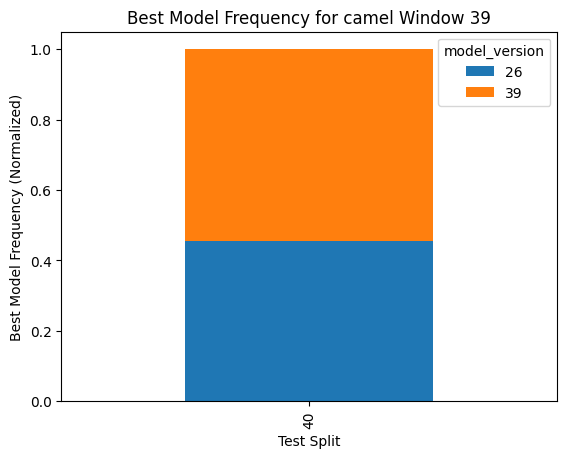

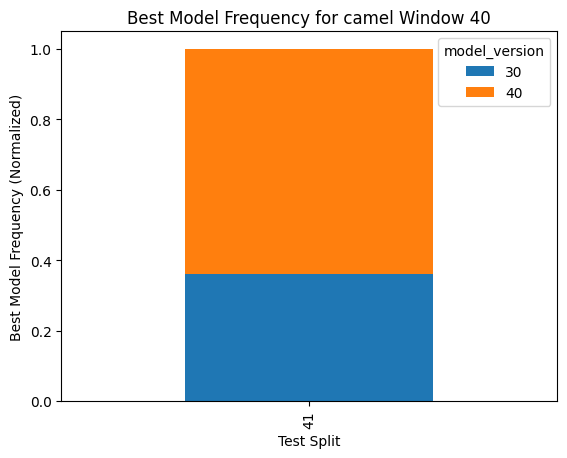

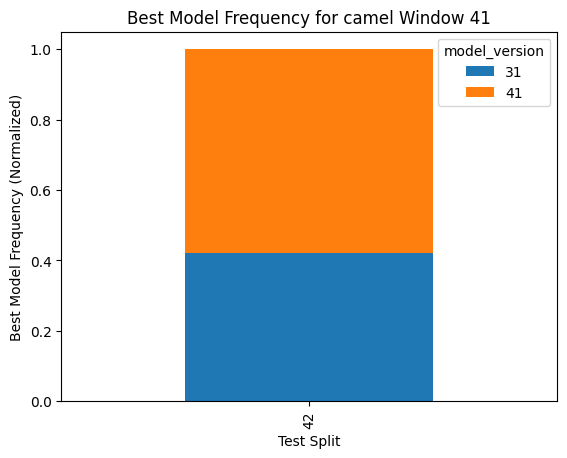

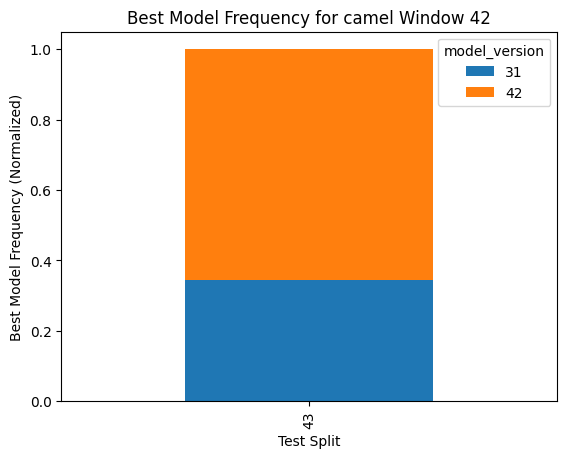

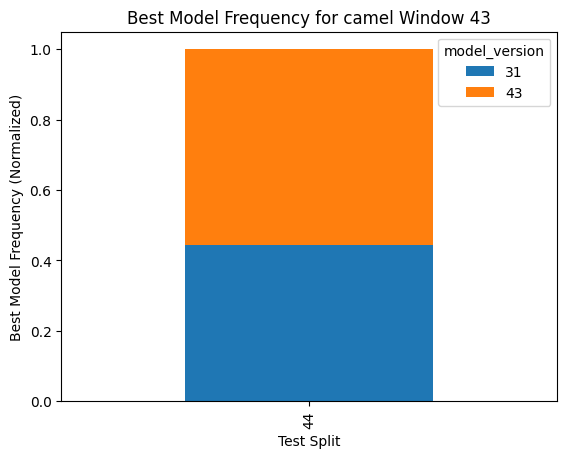

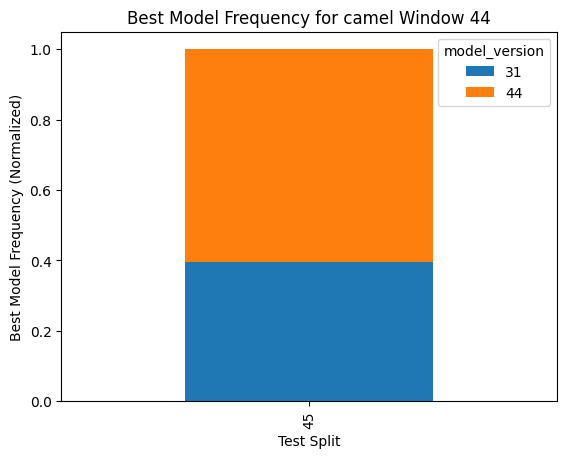

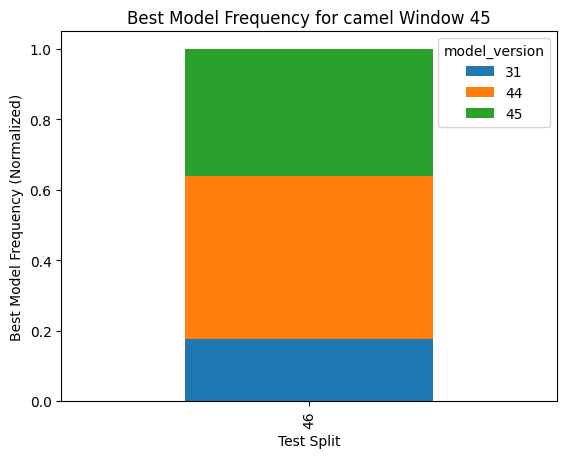

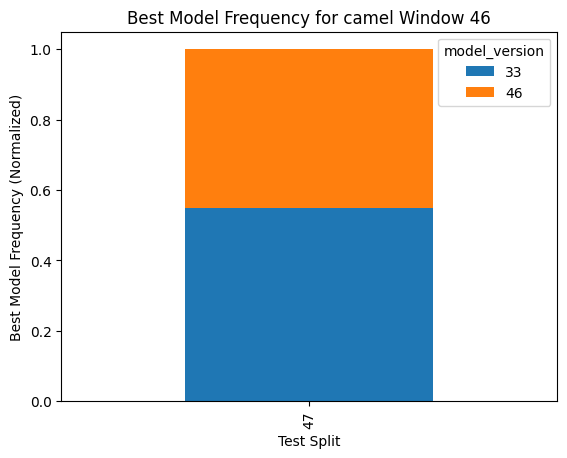

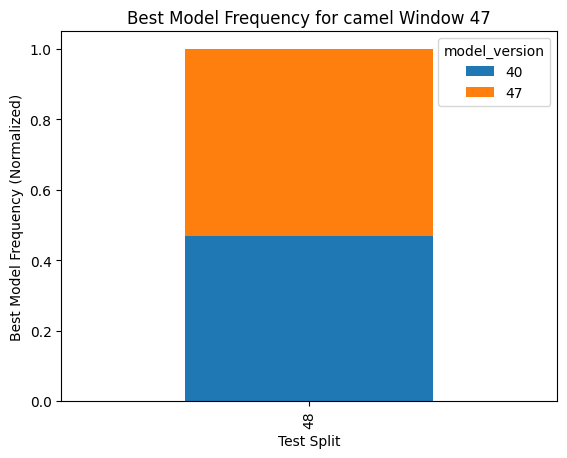

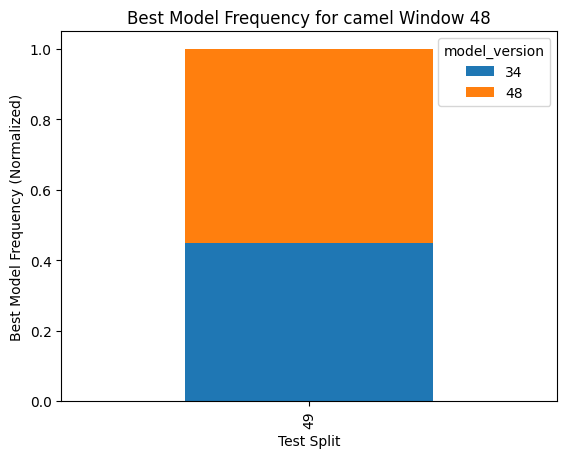

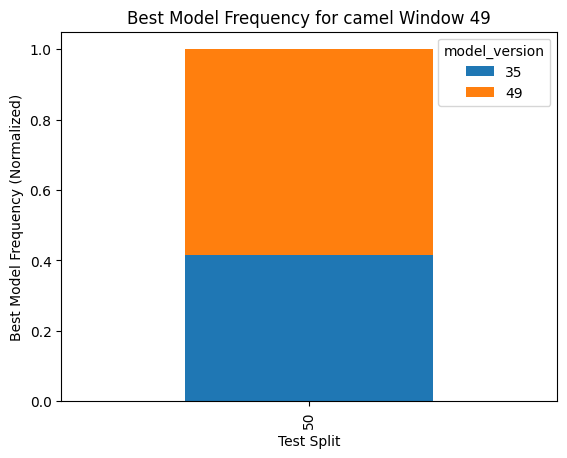

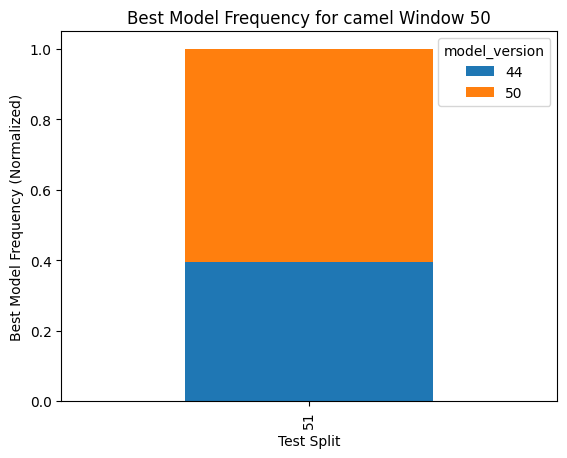

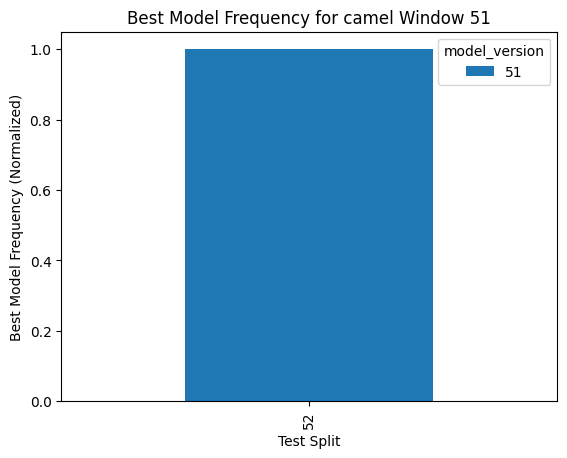

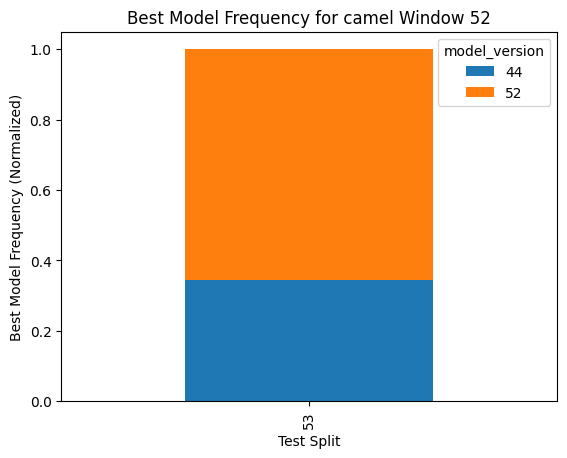

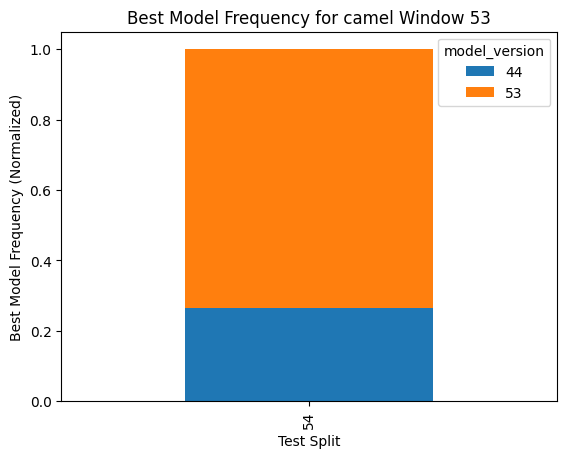

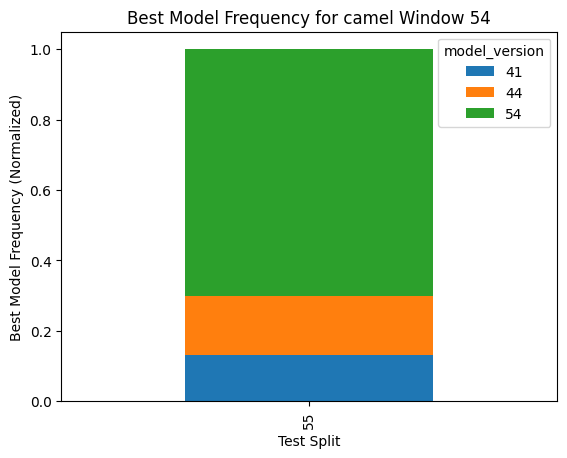

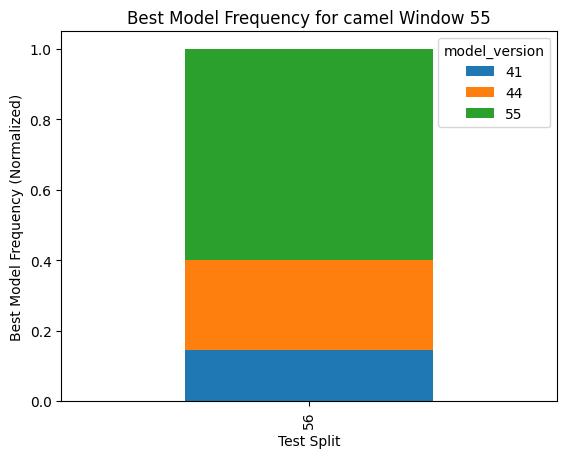

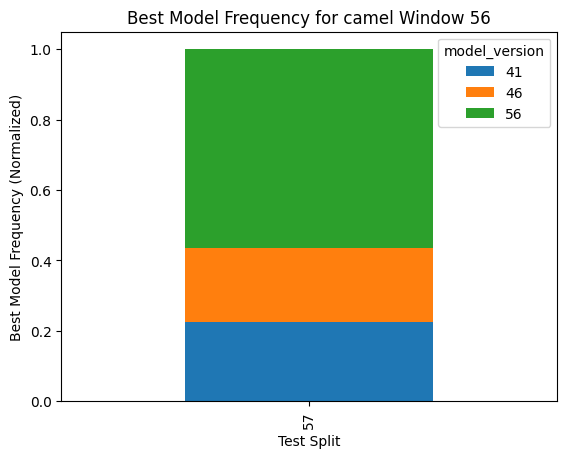

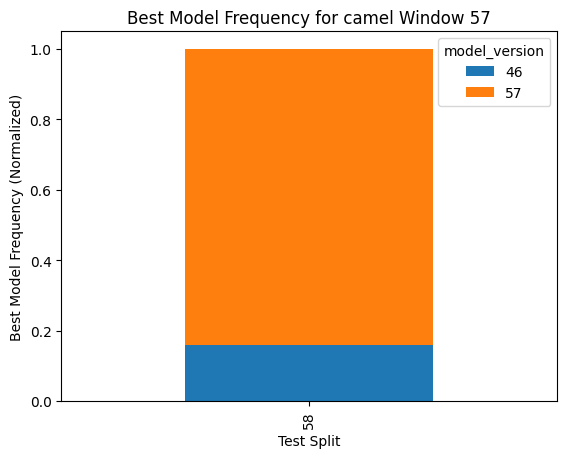

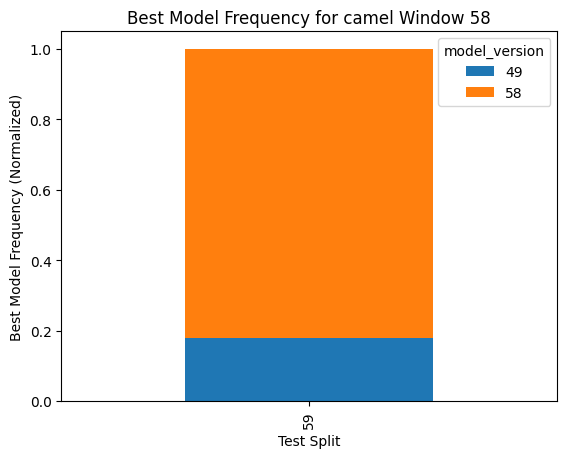

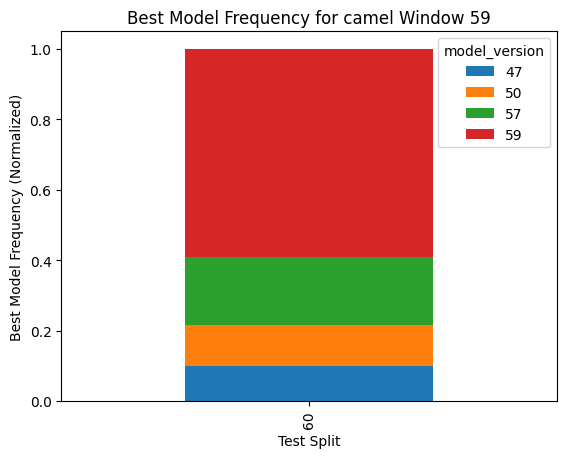

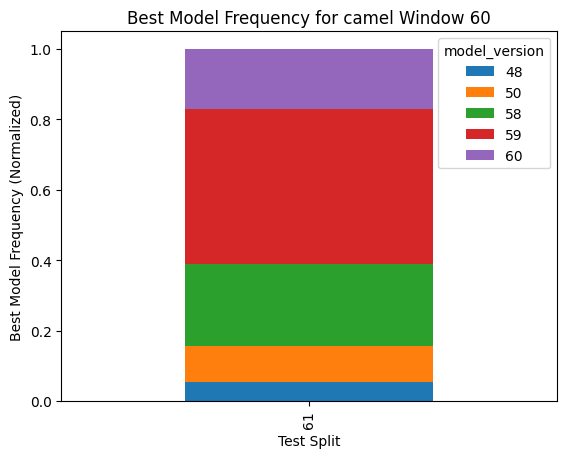

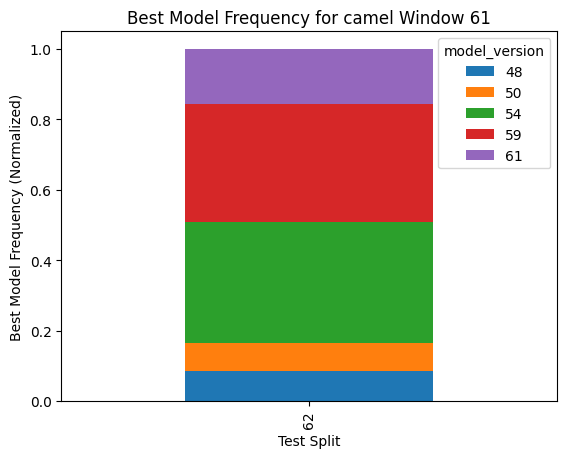

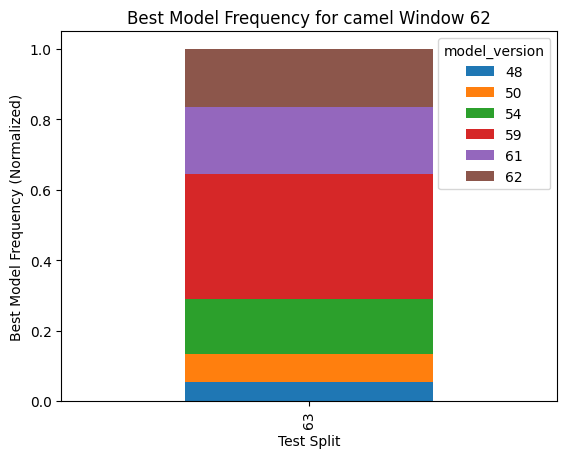

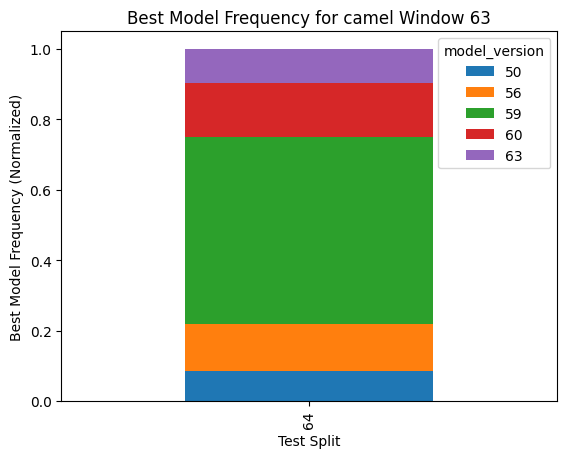

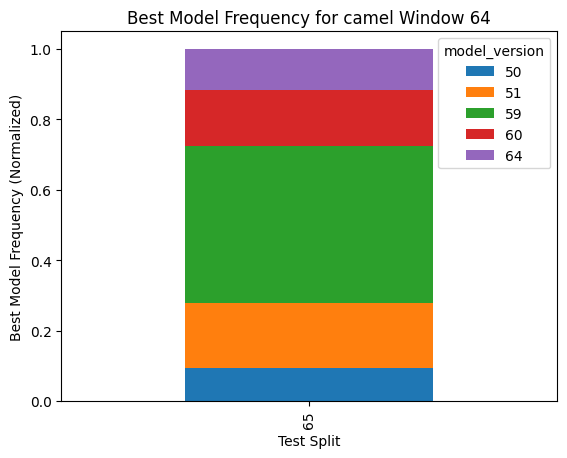

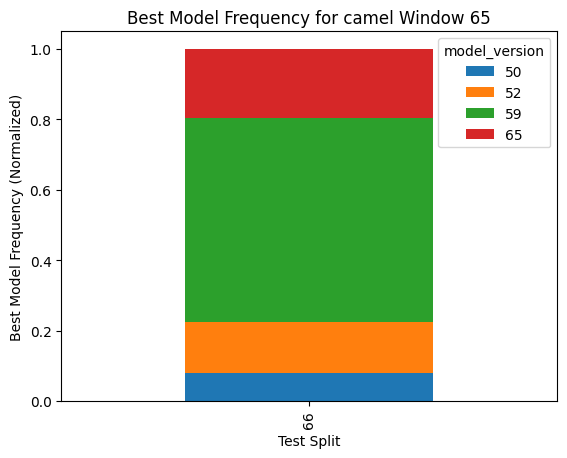

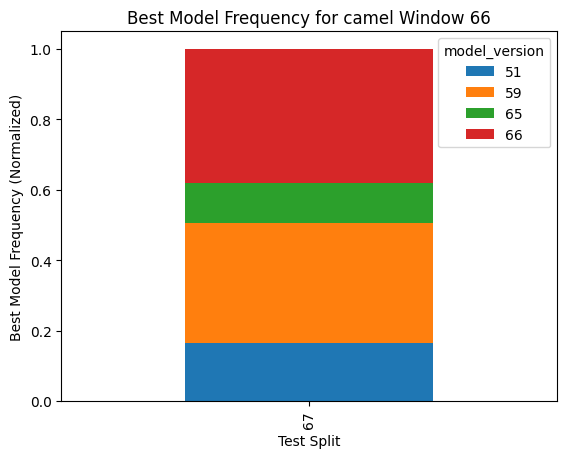

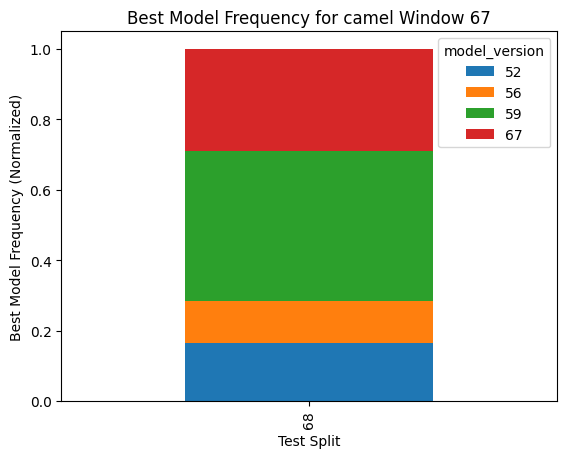

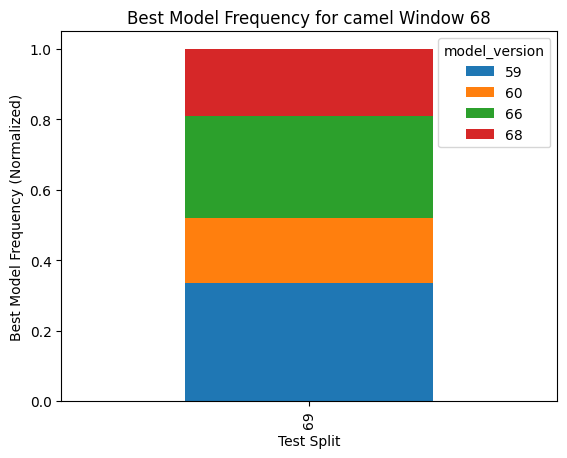

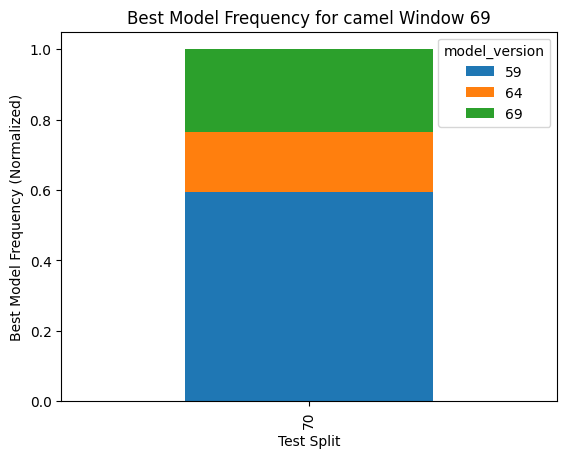

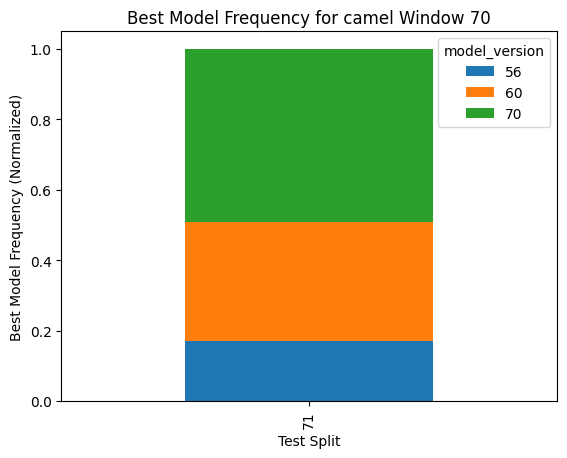

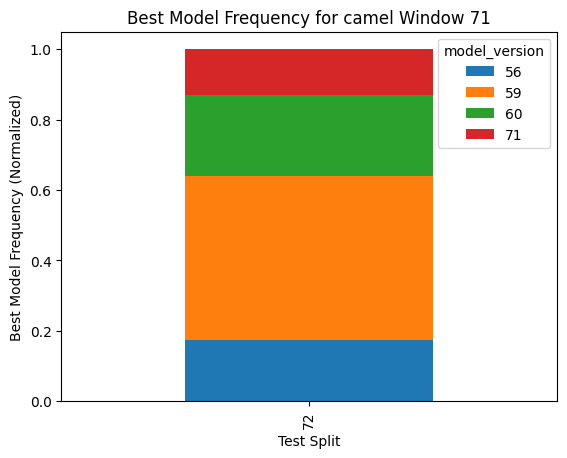

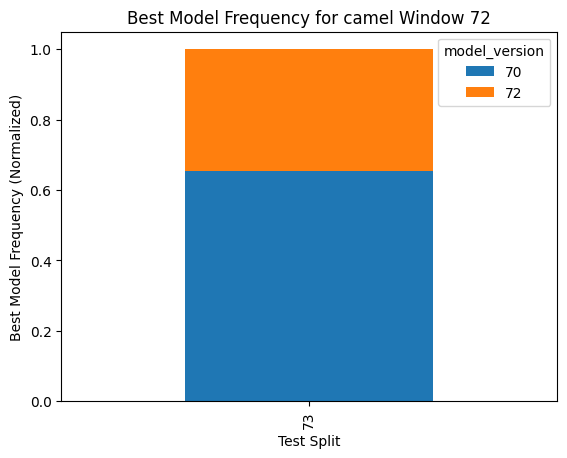

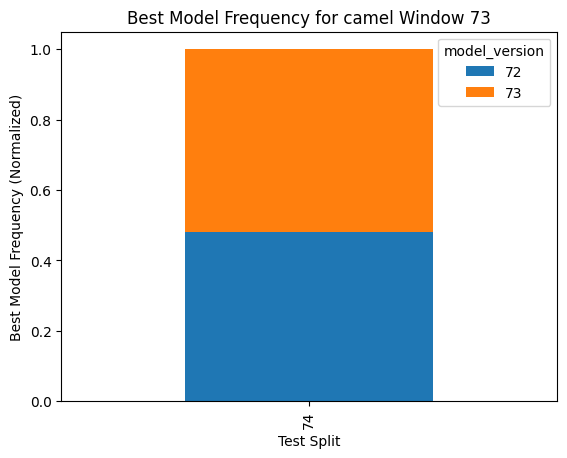

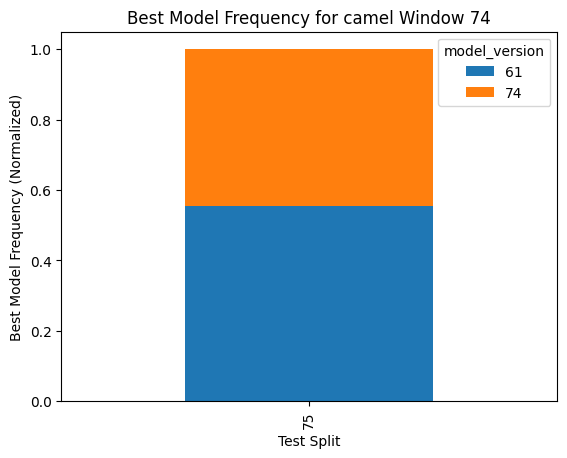

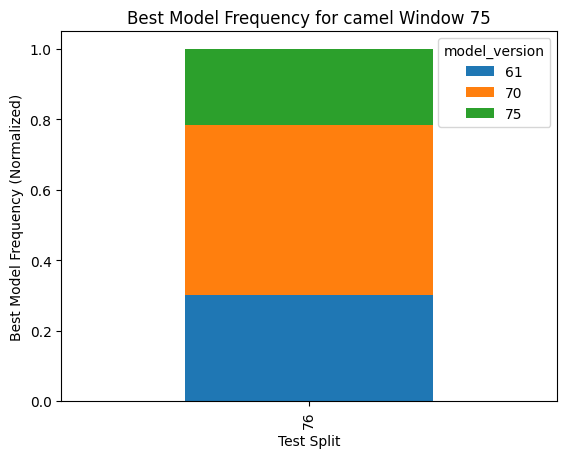

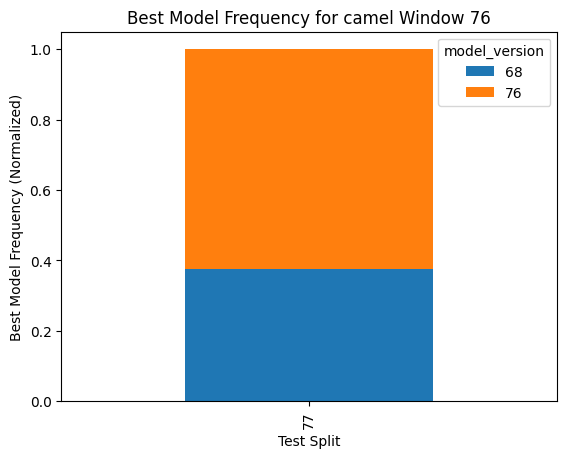

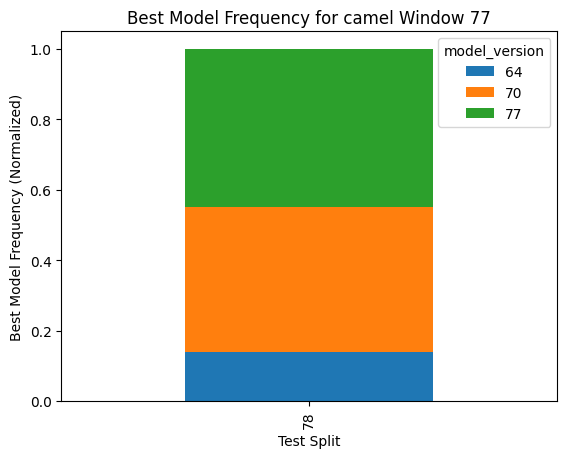

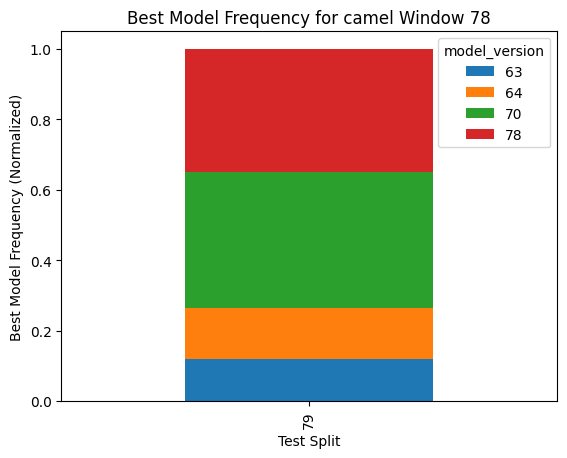

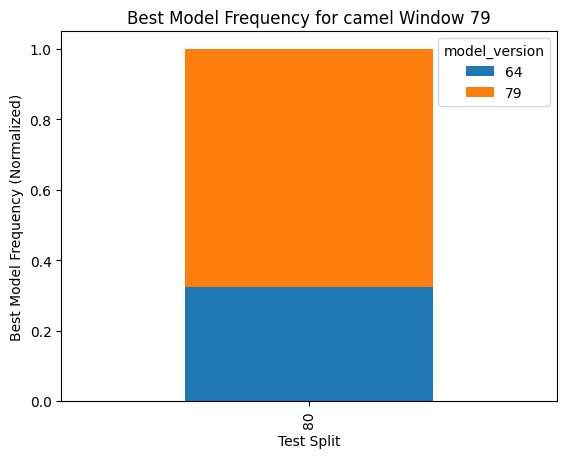

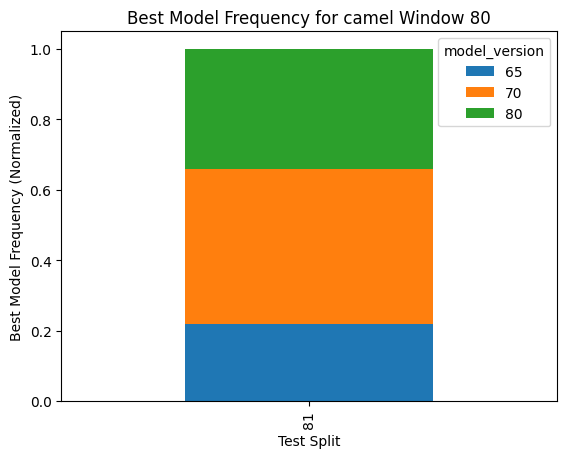

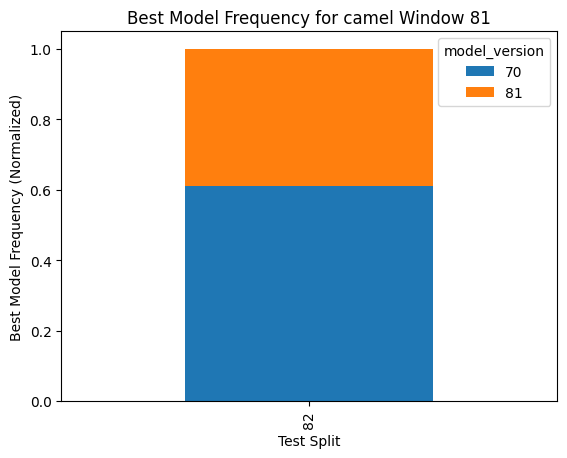

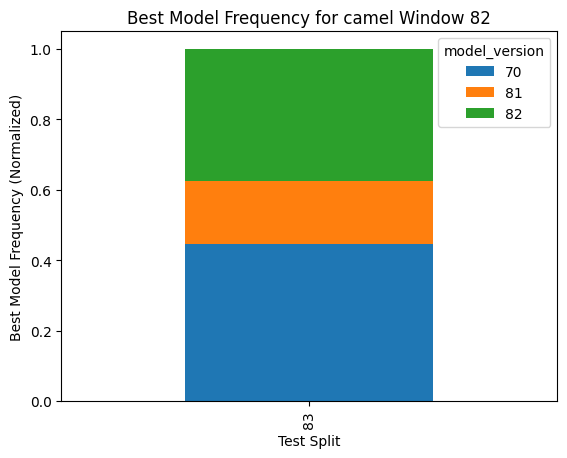

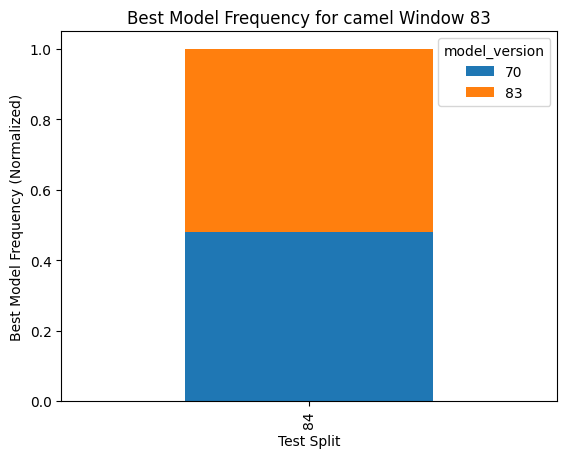

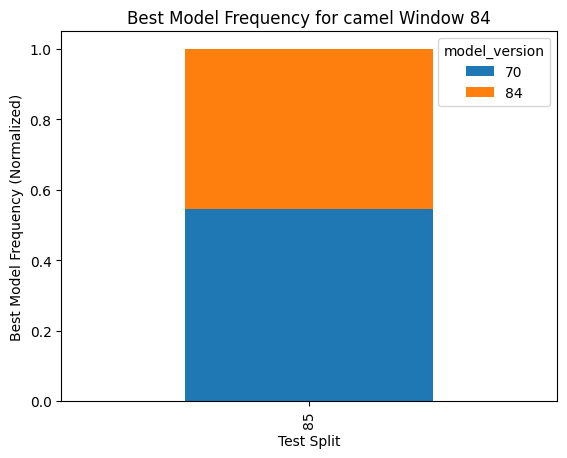

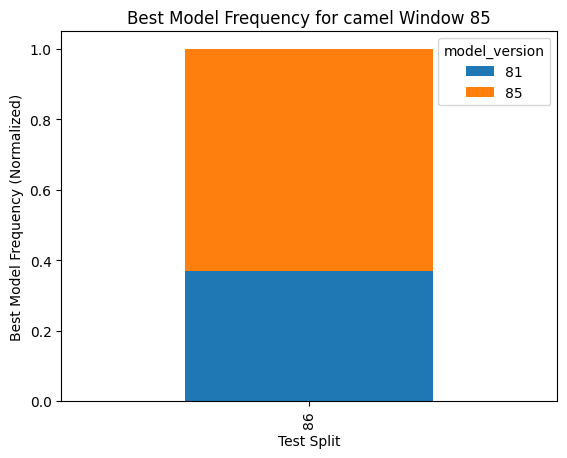

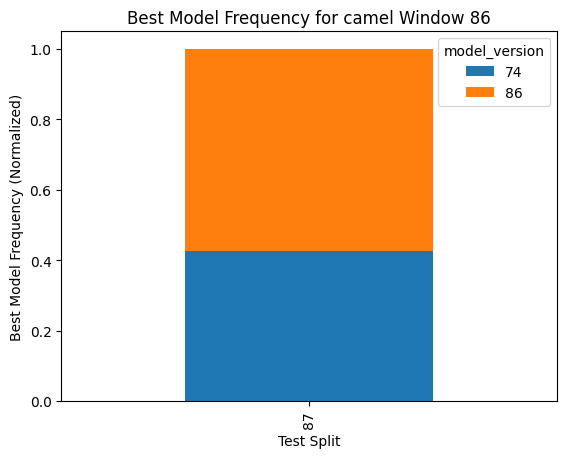

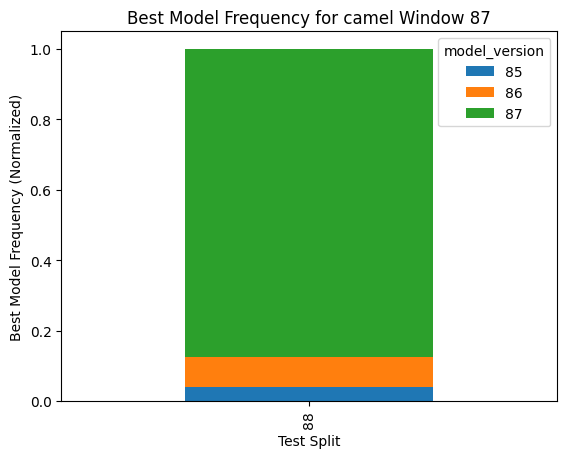

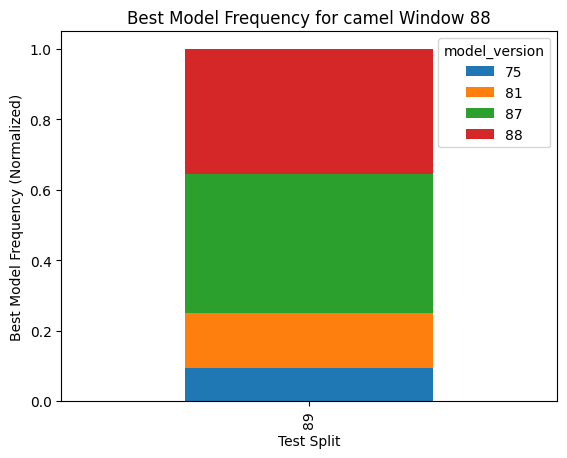

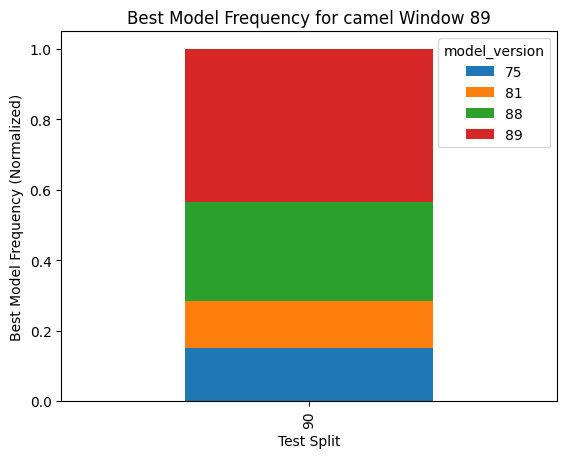

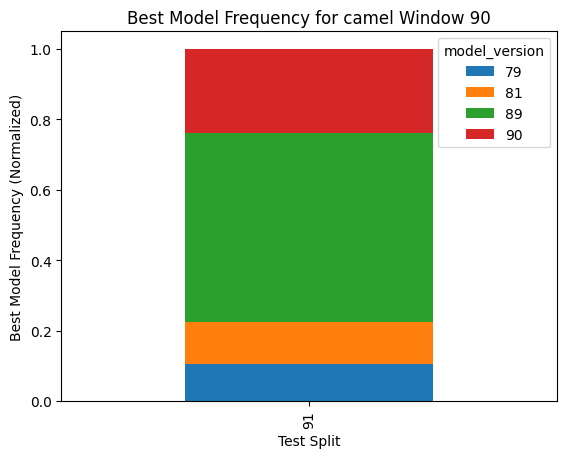

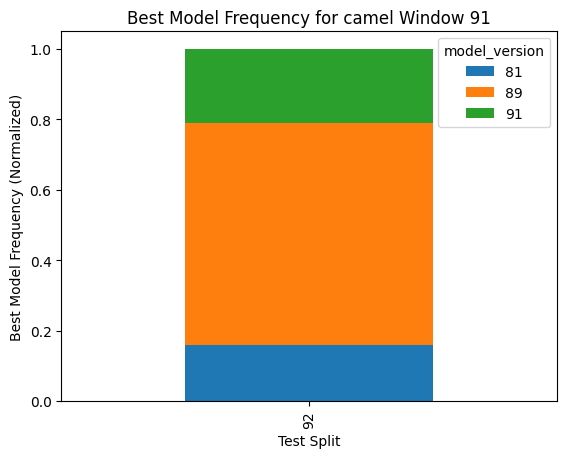

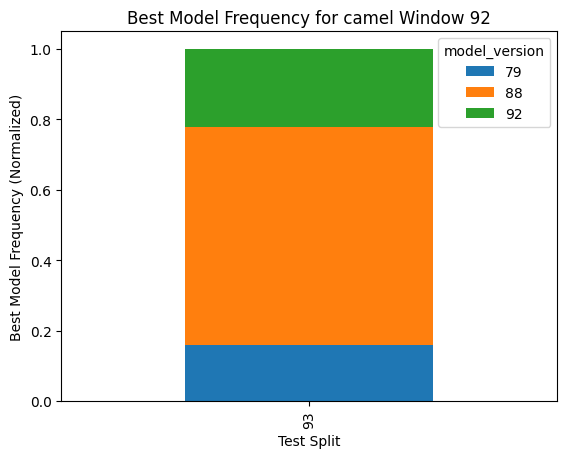

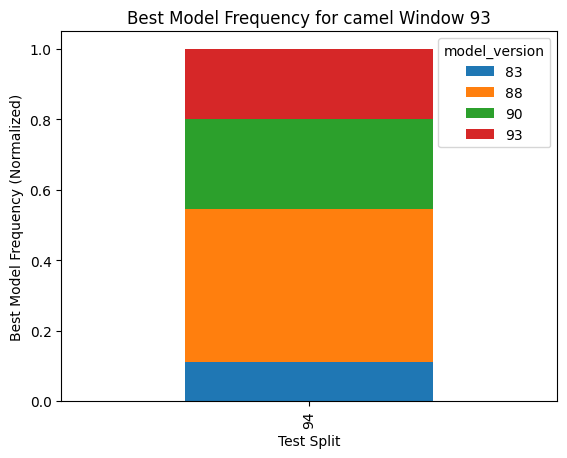

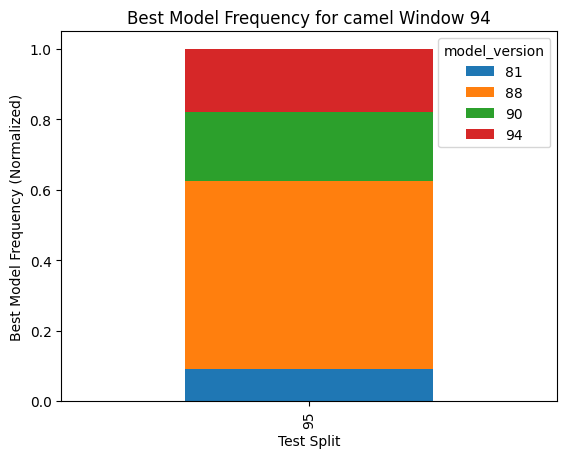

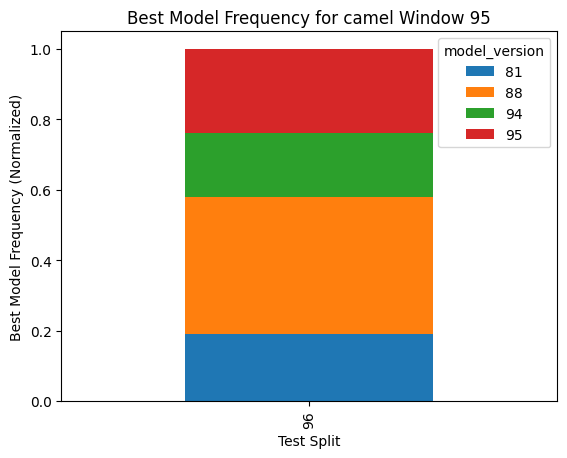

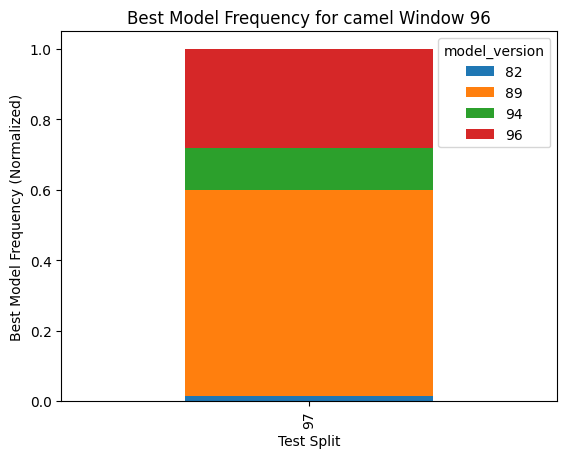

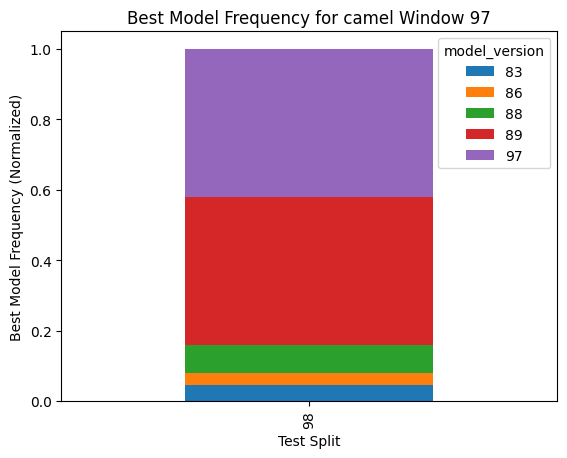

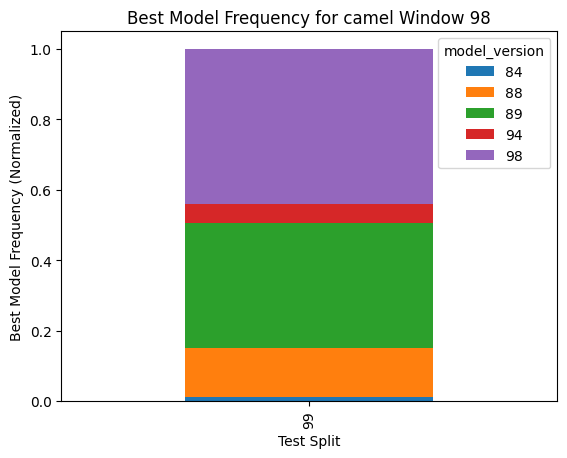

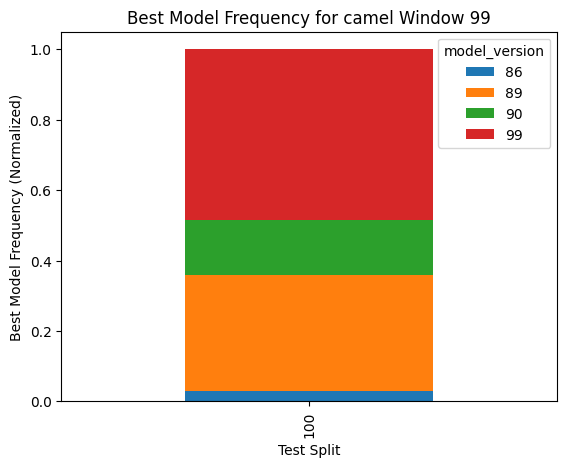

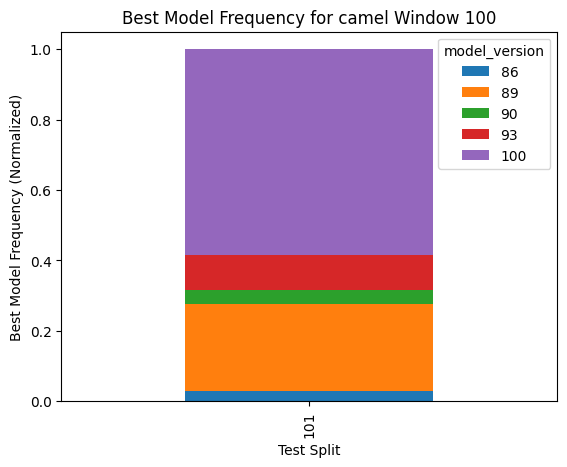

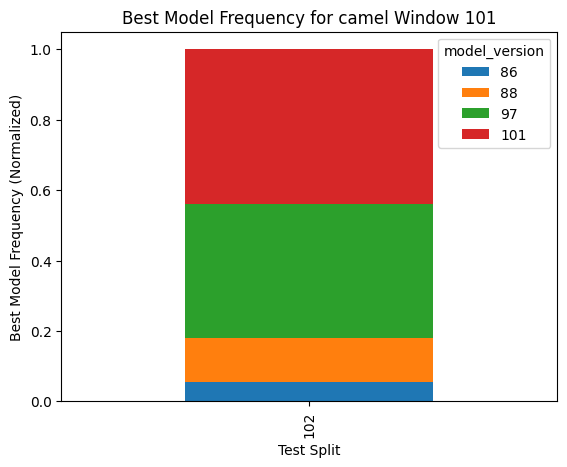

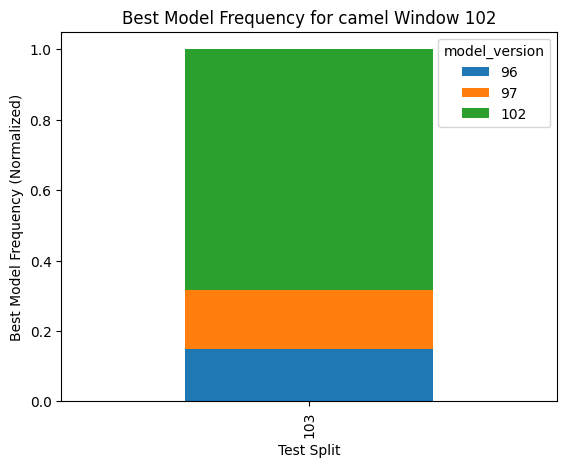

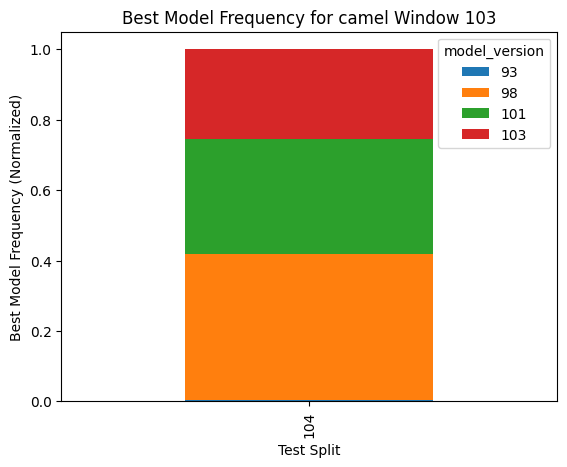

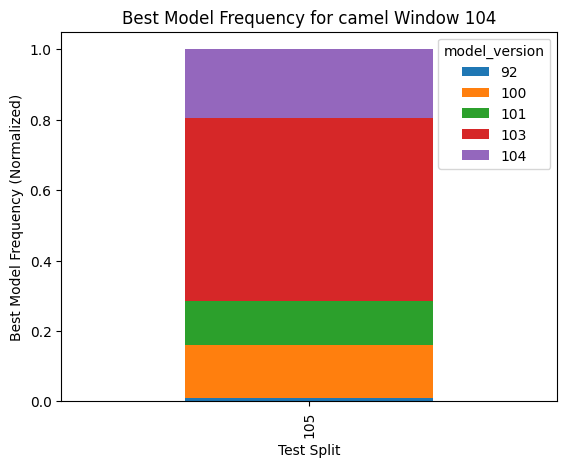

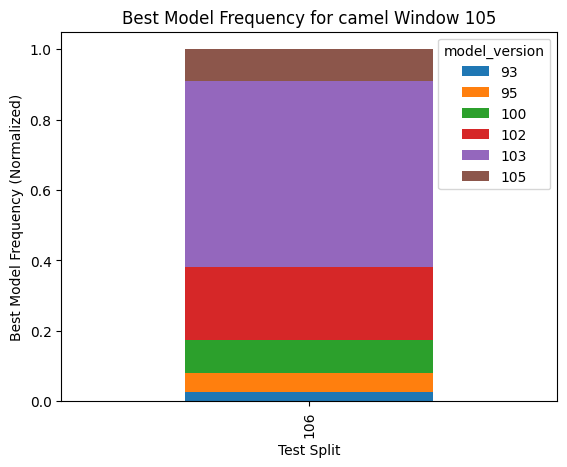

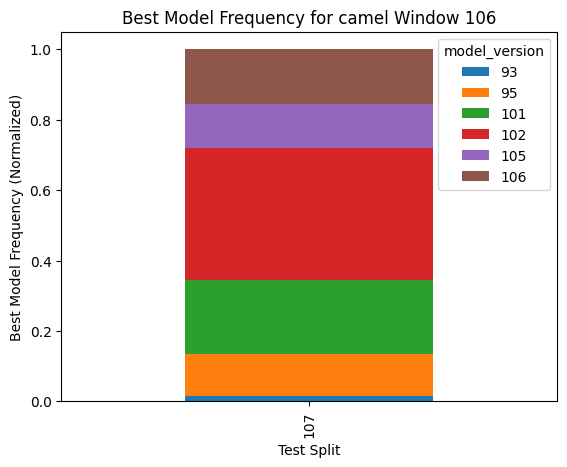

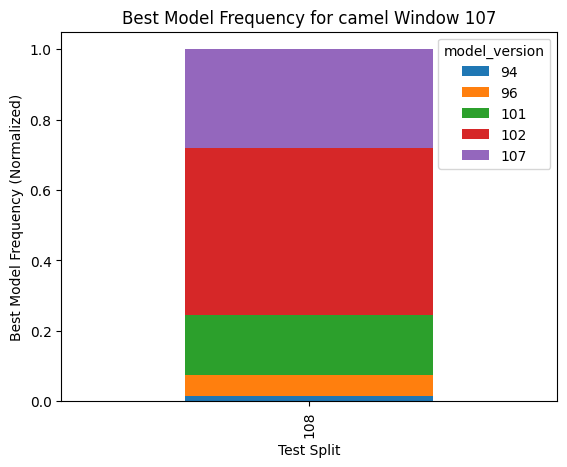

In [12]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")
    plt.show()